## Double Trapezoidal Filtering (DTF) Algorithm 
This program uses the recursive algorithm (could be directly implemented in FPGA) to obtain double trapezoidal filter 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

Initialize the variables:
 *** 
* constant offset is baseline
* amp is signal amplitude
* noise_amp is amplitude of electronic noise
* tau is decay constant of the exponential signal
* length is the length of the waveform
* rise_time is the time given to DTF to rise
* flat_top is the time given to DFT to remain flat at the top and at the bottom

In [2]:
baseline=0.
amp=25
noise_amp=20.
tau=500
length=7000
rise_time=400
flat_top=500

Lets define a exponential function

In [3]:
x=np.arange(-3500,3500,1)
def expo(amp, x, tau):
    y=[0]*len(x)#x*0
    for i in range (1, len(x)): 
        if (x[i] > 0):
            y[i] = amp * np.exp(-x[i]/tau)
        else:
            y[i] = 0
    return y

Lets make a numpy array for the noise and constant offset (named as baseline)

In [4]:
N=[0.]*7000
N=np.array(N)
for i in range (0,7000):
    N[i]=random.uniform(-1,1)
N=N*noise_amp
#now baseline offset
baseline_c=[baseline]*7000
baseline_c=np.array(baseline_c)
A = baseline_c+expo(amp, x, tau)
A=np.array(A)
#Hence the total signal
T=A+N

Plot of input signal with constant offset and noise

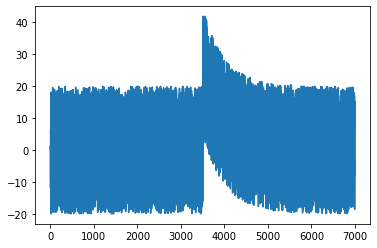

In [5]:
plt.plot(T)

## Preliminary DTF to understand the concept: It takes two rise time to go from top to bottom


In [6]:
input1=T
trap_new = [0]*length
trap_n=[0]*length
wave_c=[0]*length
wave=[0]*length
trap_new=np.array(trap_new)
for i in range(0, length):
        #single trapezoidal filter for exponential decay
        if i>=(4*rise_time +2*flat_top):
            wave[i]=input1[i]-input1[i-rise_time]-input1[i-rise_time-flat_top]+input1[i-3*rise_time-flat_top]+input1[i-3*rise_time-2*flat_top]-input1[i-4*rise_time-2*flat_top]
            wave_c[i] = wave_c[i-1]+wave[i]
            trap_n[i] = trap_n[i-1]+wave_c[i]+tau*wave[i]

for i in range(0, length):
    trap_n[i] = trap_n[i]/(rise_time*tau)
    #trap_o[i]=trap_o[i]/rise_time

<b>Plot of filtering response with the signal 

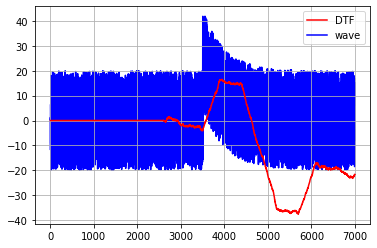

In [7]:
plt.plot(trap_n, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.grid()
plt.show()


<b>Plot of filtering response with the signal : zoomed plot (to see how it is working)

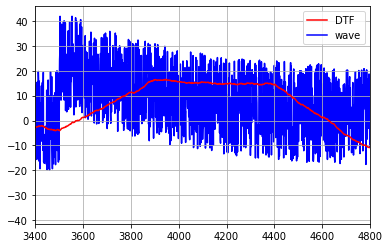

In [8]:
plt.plot(trap_n, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.xlim(3400,4800)
plt.grid()
plt.show()


## Standard DTF Used in our Nab-DAQ: It takes one rise time to go from top to bottom


In [9]:
input1=T
trap_new = [0]*length
trap_n=[0]*length
wave_c=[0]*length
wave=[0]*length
trap_new=np.array(trap_new)
for i in range(0, length):
        #single trapezoidal filter for exponential decay
        if i>=(3*rise_time +2*flat_top):
            wave[i]=input1[i]-input1[i-rise_time]-2*input1[i-rise_time-flat_top]+input1[i-2*rise_time-flat_top]+input1[i-2*rise_time-flat_top]+input1[i-2*rise_time-2*flat_top]-input1[i-3*rise_time-2*flat_top]
            wave_c[i] = wave_c[i-1]+wave[i]
            trap_n[i] = trap_n[i-1]+wave_c[i]+tau*wave[i]

for i in range(0, length):
    trap_n[i] = trap_n[i]/(rise_time*tau)
    #trap_o[i]=trap_o[i]/rise_time

<b>Plot of filtering response with the signal 

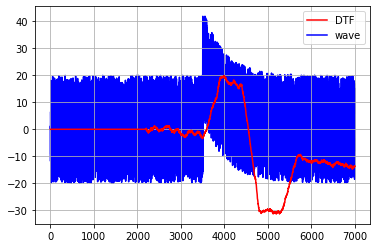

In [10]:
plt.plot(trap_n, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.grid()
plt.show()


<b>Plot of filtering response with the signal : zoomed plot (to see how it is working)

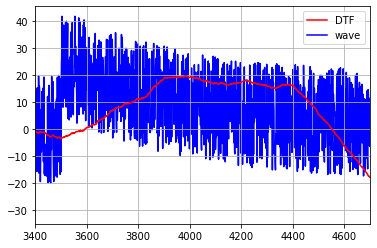

In [11]:
plt.plot(trap_n, color='r', label='DTF', zorder=2)
##plt.plot(trap_o, color='g', label='DTF inverted', zorder=1)
plt.plot(T, color='b', label='wave', zorder=0)
plt.legend()
plt.xlim(3400,4700)
plt.grid()
plt.show()